References:
* https://github.com/JustGlowing/minisom
* https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb
* https://towardsdatascience.com/understanding-self-organising-map-neural-network-with-python-code-7a77f501e985

## **Introduction**

In this project, we have used a data set with examples of handwritten digits. There are 1797 examples and each example has 64 pixels as inputs and 1 output (0,1,2,3,... or 9).

Information about the dataset (from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html):
* Classes: 10
* Samples per class: ~180
* Samples total: 1797
* Dimensionality: 64
* Features: integers 0-16

In [82]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation , colors
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib
import matplotlib.cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

Upload the dataset

In [84]:
digits = load_digits()
pixels = pd.DataFrame(digits['data'])
target = pd.DataFrame(digits['target'])

Normalize and split training and test datasets

In [85]:
x = pixels.values
#y = encoder_target.values
y = target.values    #one=hot enconding is not necessary in this problem

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(1437, 64) (1437, 1) (360, 64) (360, 1)


## **Hyperparameters**:
* x: x dimension of the SOM
* y: y dimension of the SOM
* input_len: number of the elements os the vectors in the input
* sigma: spread of the neighborhood function (sigma(t) = sigma / (1+t/T))
* learning_rate (learning_rate(t)=learning_rate/(1+t/T))
* decay_function (function that reduces learning_rate and sigma at each interaction)
* neighborhood_function (default=gaussian): function that weights the neighborhood of a position in the map
* topology (rectangular (default) or hexagonal)
* activation_distance: distance used to active the map (euclidean (default), consine,manhattan, chebyshev)


In [9]:
n_neurons=14
m_neurons=14
input_len=64
sigma=1.0
learning_rate=1.0

In [10]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma,learning_rate)

In [11]:
som.train(train_x,10000,verbose=True) #train with 10000 interactions

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 15.901573708719015


Pode-se ver qual é o Wining Neuron para cada data de treinamento

In [12]:
som.winner(train_x[0])

(7, 6)

## **Definitions** 

Rerefence: Evaluating Self-Or aluating Self-Organizing Map Quality Measur ganizing Map Quality Measures as Conv es as Convergence
Criteria (from Gregory T. Breard )

**Quantization error**:  is a measure of the average distance between the data points and the map nodes to which they are mapped, with smaller values indicating a better fit.

**Topographic error**: TE is calculated by finding the best-matching and second-best-matching neuron in the map for each input and then evaluating the positions. If the nodes are next to each other, then we say topology has been preserved for this input. If not, then this is counted as an error. The total number of errors divided by the total number of data points gives the topographic error of the map.



# Distance Map (U-Matrix)

adaptado de https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

Os neurônios do maps são mostrados como um array de células e as cores estão relacionadas a soma das distâncias de cada neurônio aos seus vizinhos.

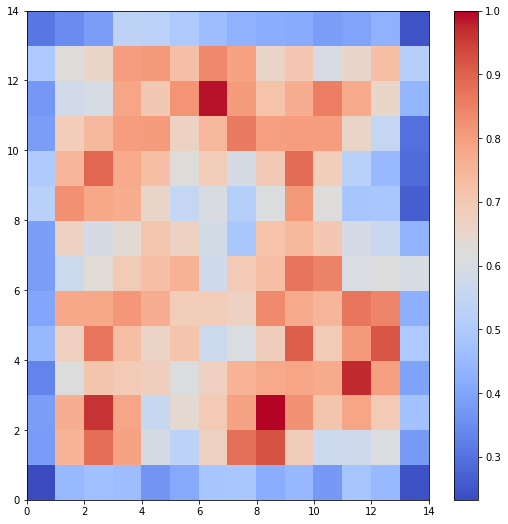

In [13]:
plt.figure(figsize=(9, 9))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # plotting the distance map as background
plt.colorbar()
plt.show()

Nessa U-matrix nota-se que as extremidades em geral estão azuis. Isso ocorre pois dentro de um cluster, os elementos tendem a ser parecidos (próximos), de modo que as suas distâncias são pequenas. Aproximando-se do centro, chegamos em fronteiras de clusters (como se nota na figura Scatter Chart que será mostrado a seguir). Nessas regiões de fronteira, elementos vizinhos não tem uma distância euclidiana pequena, por se tratar de uma zona de transição, de forma que acabam se tornando zonas vermelhas.

# Samples per class falling in a specific neuron

CÓDIGO RETIRADO de https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

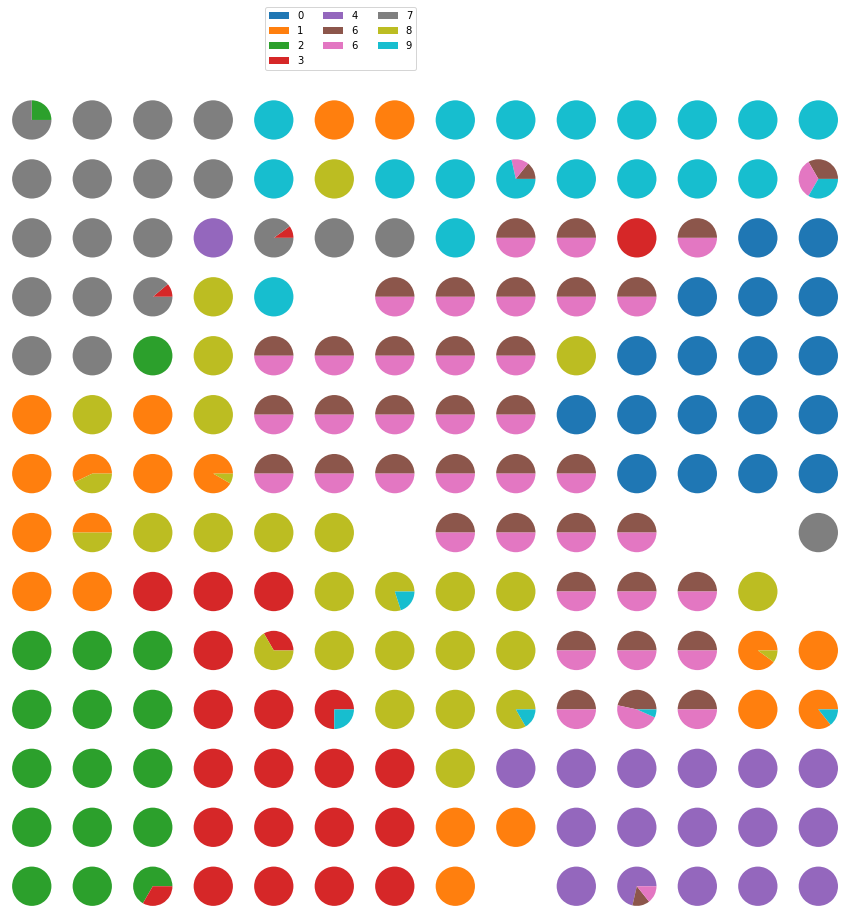

In [14]:
import matplotlib.gridspec as gridspec

label_names = {0:'0',1:'1', 2:'2', 3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}
target = []
for i in range(len(train_y)):
  target.append(train_y[i][0])

labels_map = som.labels_map(train_x, [label_names[t] for t in target])

fig = plt.figure(figsize=(15, 15))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.show()


Da figura anterior, notamos que grande parte neurônios acabam sendo associados sempre a dígitos de mesma natureza, enquanto outros ficam divididos entre uma pequena quantidade de diferentes tipos de dígitos. Isso mostra que os neurônios realmente vão se adequando a tipos específicos de entradas, o que mostra seu poder de clusterização.

## **Show labels to the trained SOM**
baseado em https://towardsdatascience.com/understanding-self-organising-map-neural-network-with-python-code-7a77f501e985

Código para pegar chave de um dicionário com valor máximo: https://datagy.io/python-get-dictionary-key-with-max-value/#:~:text=The%20simplest%20way%20to%20get,What%20is%20this%3F&text=What%20we%20can%20see%20here,max%20value%20of%20that%20iterable.


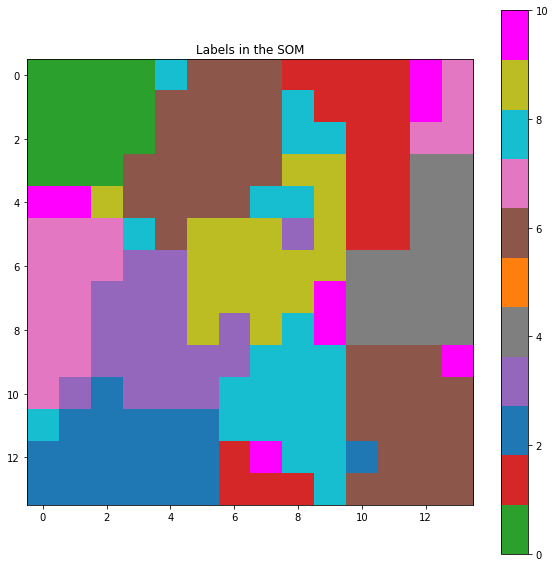

In [41]:
label_names = {0:'0',1:'1', 2:'2', 3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}
target = []
for i in range(len(train_y)):
  target.append(train_y[i][0])

labels_map = som.labels_map(train_x, [label_names[t] for t in target])

#Obs.: the function "labels_map" Returns a dictionary wm where wm[(i,j)] is a dictionary
#that contains the number of samples from a given label
#that have been mapped in position i,j.

mapa = np.zeros(shape=(n_neurons,m_neurons),dtype=np.int64)
for row in range(n_neurons):
  for col in range(m_neurons):
    if(type(labels_map[row,col]) !=list): #usamos esse if, pois se um neurônio nunca foi ativado, labels_map é uma lista, e não dicionário
      max_value = max(labels_map[row,col],key = labels_map[row,col].get)
      mapa[row][col] = max_value   #esse trecho serve para descobrir qual dígito que mais foi mapeado em certo neurônio
    else:
      mapa[row,col]=10

fig = plt.figure(figsize=(10, 10))
cmap = ListedColormap(['tab:green', 'tab:red','tab:blue','tab:purple','tab:gray','tab:orange','tab:brown','tab:pink','tab:cyan','tab:olive','magenta'])  
plt.imshow(mapa,cmap=cmap)
plt.colorbar()
plt.title('Labels in the SOM')
plt.show()

Do código acima, percebemos claramente a formação de clusters.

# Scatter Chart

retirado de https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

Um offset aleatório foi acrescentado para impedir a sobreposição de pontos dentro da mesma célula

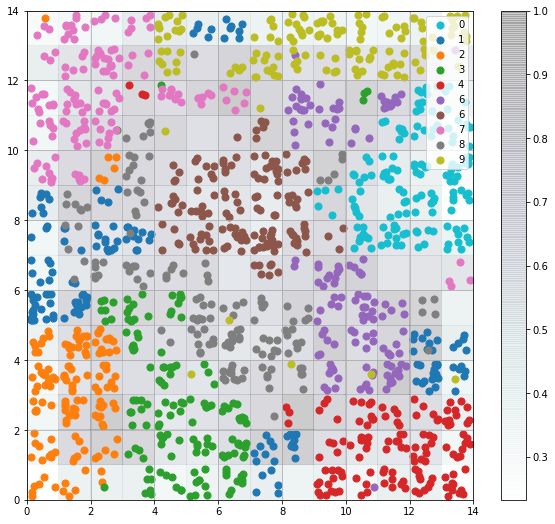

In [ ]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Dos três gráficos anteriores, podemos ver claramente a formação de clusters. É interessante notar que os pontos da mesma classe não estão necessarimanete todos juntos, isto é, todos em um mesmo cluster. Considere, por exemplo, os pontos azuis, que representam a classe 1. 

Da figura anterior, podemos observar que houve agrupamento dos pontos azuis em 3 regiões diferentes.

Note que os grupos formados são bastante homogêneos, tendo poucos elementos "intrusos" de outra cor em cada agrupamento (cluster).

## **Outlier Detection**

retirado de https://github.com/JustGlowing/minisom/blob/master/examples/OutliersDetection.ipynb

In [19]:
n_neurons=14
m_neurons=14
input_len=64
sigma=1.0
learning_rate=1.0
outliers_percentage = 0.01 #vamos considerar apenas os 1% com maior erro de quantização

som = MiniSom(n_neurons,m_neurons,input_len,sigma,learning_rate)
som.train(train_x,10000,verbose=True) #train with 10000 interactions

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 15.891692251845873


Error treshold: 26.40998472535957


Text(0, 0.5, 'frequency')

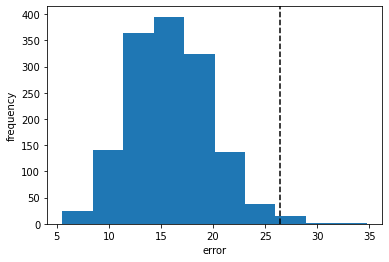

In [20]:
som.quantization(train_x).shape
quantization_errors = np.linalg.norm(som.quantization(train_x) - train_x, axis=1)
quantization_errors
error_treshold = np.percentile(quantization_errors, 100*(1-outliers_percentage))

print('Error treshold:', error_treshold)

is_outlier = quantization_errors > error_treshold

plt.hist(quantization_errors)
plt.axvline(error_treshold, color='k', linestyle='--')
plt.xlabel('error')
plt.ylabel('frequency')

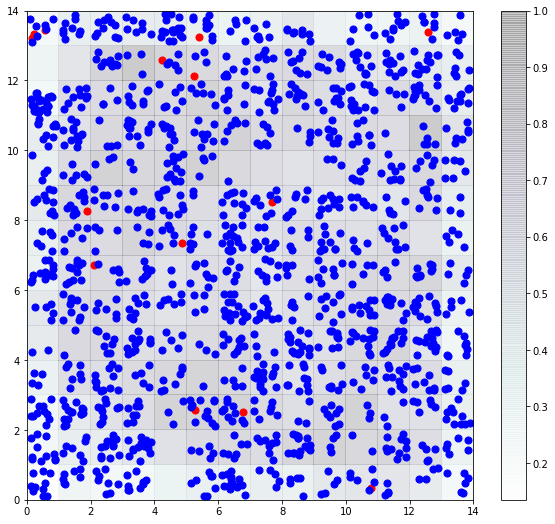

In [21]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

np.random.seed(42)

plt.scatter(w_x[is_outlier]+.5+(np.random.rand(np.sum(is_outlier))-.5)*.8,
                w_y[is_outlier]+.5+(np.random.rand(np.sum(is_outlier))-.5)*.8, 
                s=50, c='red', label='outlier')

plt.scatter(w_x[~is_outlier]+.5+(np.random.rand(np.sum(~is_outlier))-.5)*.8,
                w_y[~is_outlier]+.5+(np.random.rand(np.sum(~is_outlier))-.5)*.8, 
                s=50, c='blue', label='inlier')

Os pontos marcados em vermelho na figura anterior são os que consideramos outliers, isto é, são os 1% pontos com maior erro de quantização.

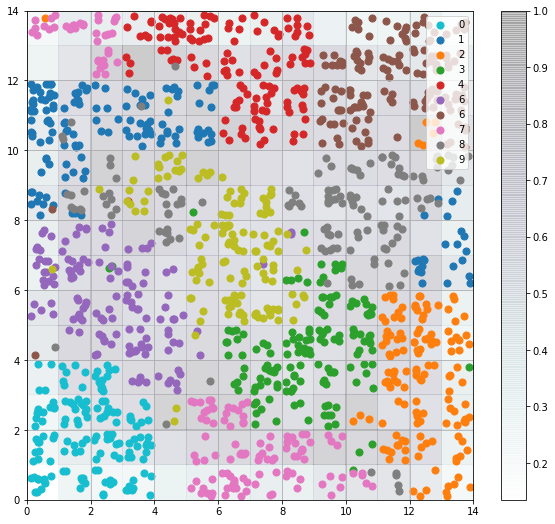

In [22]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

np.random.seed(42)

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, #np.sum(idx_target) representa a quantidade de exemplos de certo dígito
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, #np.random.rand vai gerar a quantidade de números aleatórios entre 0 e 1 que precisamos
                s=50, c=colors[c-1], label=label_names[c])                      #s representa o tamanho dos pontos
#plt.scatter(w_x[is_outlier]+.5+(np.random.rand(np.sum(is_outlier))-.5)*.8,
#                w_y[is_outlier]+.5+(np.random.rand(np.sum(is_outlier))-.5)*.8, 
#                s=50, c='black', label='outlier')


plt.legend(loc='upper right')
plt.grid()
plt.show()



## **Plot of the Quantization Error and Topographic Error**

adapted from https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

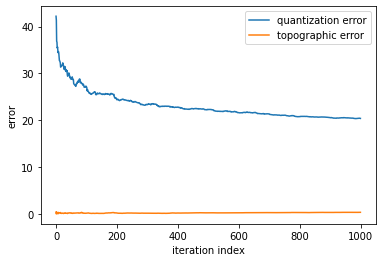

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma,learning_rate)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_x))
    som.update(train_x[rand_i], som.winner(train_x[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_x))
    t_error.append(som.topographic_error(train_x))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()


# Análise da Variação de Hiperparâmetros

In [ ]:
n_neurons=14
m_neurons=14
input_len=64
sigma=1.0
learning_rate=1.0

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma,learning_rate=1)
som.train(train_x,1000,verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 19.048730688887243


# Scatter Chart

adapted from https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

Um offset aleatório foi acrescentado para impedir a sobreposição de pontos dentro da mesma célula

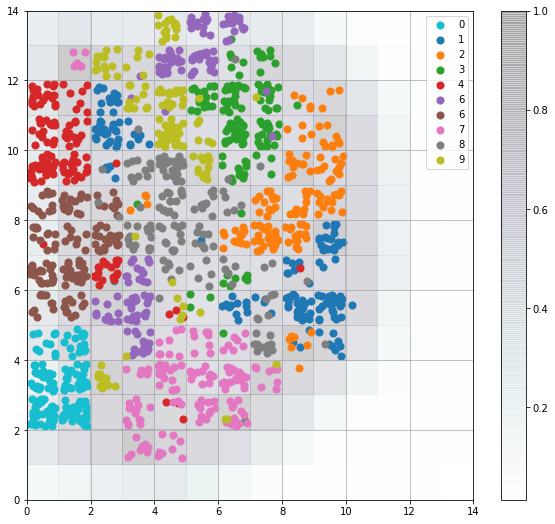

In [ ]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

É interessante notar que, ao usar menos iterações (nesse caso, apenas 1000), muitos neurônios não são ativados nunca, como se pode observar no gráfico acima.

Vamos fazer um novo experimento, com a mesma quantidade de iterações (1000), mas agora menos neurônios (8x8).

In [ ]:
n_neurons=8
m_neurons=8
input_len=64
sigma=1.0
learning_rate=1.0

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma,learning_rate=1)
som.train(train_x,1000,verbose=True) #train with 10000 interactions

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 20.65147302235871


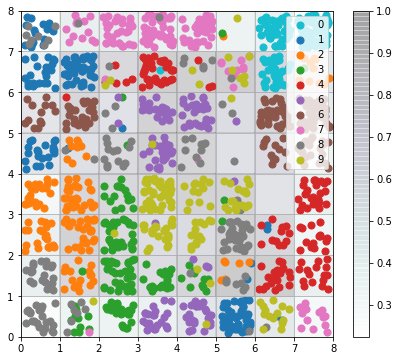

In [ ]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(7, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Nesse caso, como diminuímos a quantidade de neurônios, não ocorre mais o que aconteceu na situação anterior (de haver uma grande quanatidade de neurônios que nunca foram ativados).

## Análise da influência do sigma

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=0.1,learning_rate=1)
som.train(train_x,10000,verbose=True) #train with 10000 interactions

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 33.82036902735483


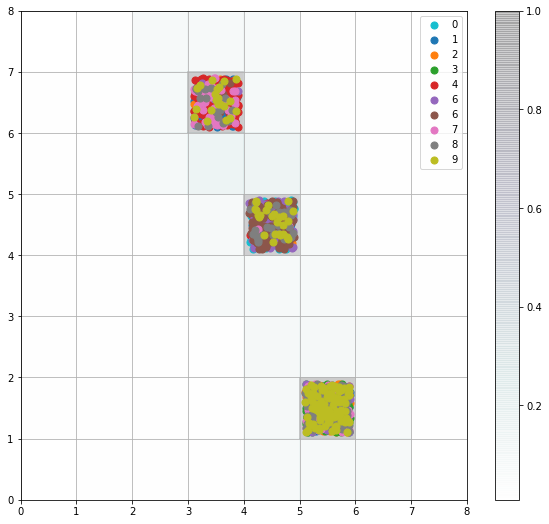

In [ ]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Utilizando sigma igual a 0.1 o que se observa é que a vizinhança é muito pequena, de forma que, quando um neurônio é o vencedor, apenas ele é atualizado e os seus vizinhos, na prática, não são atualizados. Dessa forma, tem-se um grande numero de neurônios que nunca são ativados, e os poucos que são ativados acabam por não conseguirem fazer distinção entre os tipos diferentes de entradas. O treinamento da rede nesse caso tem um resultado muito ruim, o que pode se verificar pelo erro de quantização maior do que 30.

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=0.5,learning_rate=1)
som.train(train_x,10000,verbose=True) #train with 10000 interactions

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 20.84987276320888


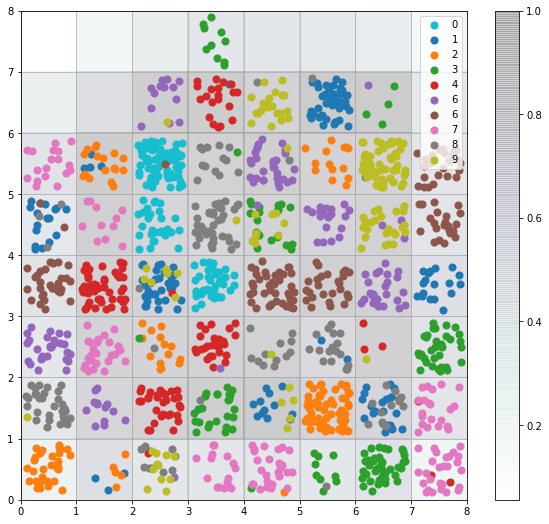

In [ ]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Com sigma igual a 0.5, acontece efeito semelhante (e muitos neurônios acabam não sendo ativados nunca), mas não é tão drástico quanto com sigma igual a 0.1.

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=20,learning_rate=1)
som.train(train_x,10000,verbose=True) #train with 10000 interactions

/usr/local/lib/python3.8/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 34.14342395779312


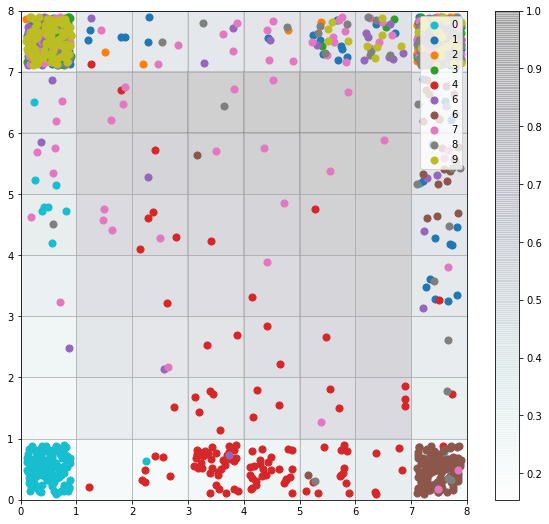

In [ ]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Por outro lado, escolhendo um valor de sigma muito grande (como 20), mesmo neurônios muito distantes do vencedor são frequentemente atualizados, de forma que os neurônios não conseguem se especializar nos diferentes tipos de entradas. Por isso, tem-se uma situação como a observada acima, na qual entradas de diferentes classes seguem misturadas.

## Análise da influência da quantidade de iterações

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=0.5,learning_rate=1)
som.train(train_x,100,verbose=True) #train with 10000 interactions
qe1 = som.quantization_error(train_x)

som = MiniSom(n_neurons,m_neurons,input_len,sigma=0.5,learning_rate=1)
som.train(train_x,1000,verbose=True) #train with 10000 interactions
qe2 = som.quantization_error(train_x)

som = MiniSom(n_neurons,m_neurons,input_len,sigma=0.5,learning_rate=1)
som.train(train_x,10000,verbose=True) #train with 10000 interactions
qe3 = som.quantization_error(train_x)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 30.08212710957235
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 25.07555855065419
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 20.512624677753596


In [ ]:
print("Erro de quantização com 100 iterações: {}".format(qe1))
print("Erro de quantização com 1000 iterações: {}".format(qe2))
print("Erro de quantização com 1000 iterações: {}".format(qe3))

Erro de quantização com 100 iterações: 30.08212710957235
Erro de quantização com 1000 iterações: 25.07555855065419
Erro de quantização com 1000 iterações: 20.512624677753596


O efeito da quantidade de iterações é simples: quanto maior a quantidade de iterações, mais a rede é treinada e portanto, o erro de quantização diminui. Isso significa que os neurônios vencedores passam a ser mais próximos e mais representativos das entradas.

## Análise da quantidade de neurônios

In [ ]:
n_neurons=30
m_neurons=30
input_len=64
sigma=1.0
learning_rate=1.0

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=1)
som.train(train_x,10000,verbose=True) #train with 10000 interactions

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 12.970113819350413


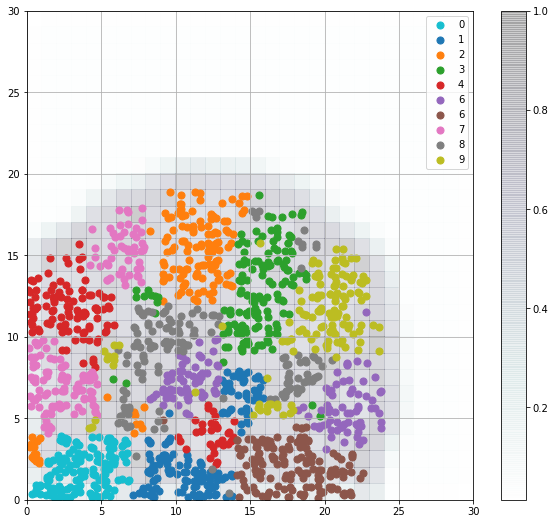

In [ ]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

U-Matrix

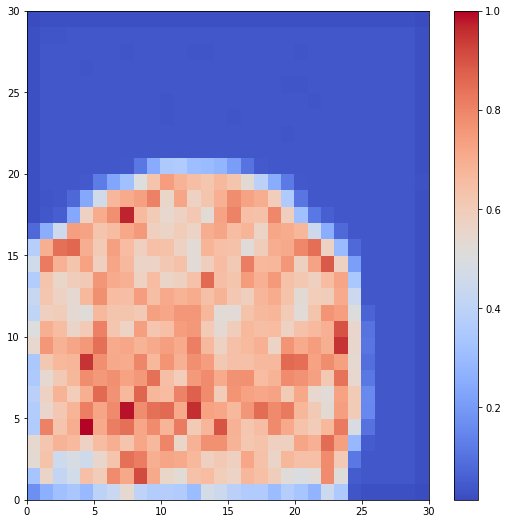

In [ ]:
plt.figure(figsize=(9, 9))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # plotting the distance map as background
plt.colorbar()
plt.show()

Com uma grande quantidade de neurônios (30x30), nota-se que é possível separar as diferentes classes. Entretanto, muitos neurônios ficam desativados sempre, o que mostra que essa grande quantidade na verdade é desnecessária e boa parte do mapa não é utilizado.

Para usar toda a extensão em um mapa com maior quantidade de neurônios, é necessário aumentar o sigma inicial, conforme mostrado a seguir.

In [79]:
n_neurons=30
m_neurons=30
input_len=64
sigma=6             #vamos usar um sigma maior para usar toda a extensão do mapa
learning_rate=1.0

In [77]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=sigma,learning_rate=1)
som.train(train_x,10000,verbose=True) #train with 10000 interactions

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 19.661137239564155


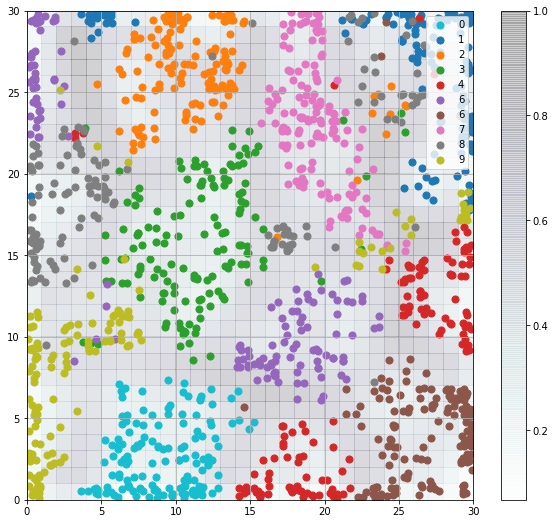

In [78]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

U-Matrix

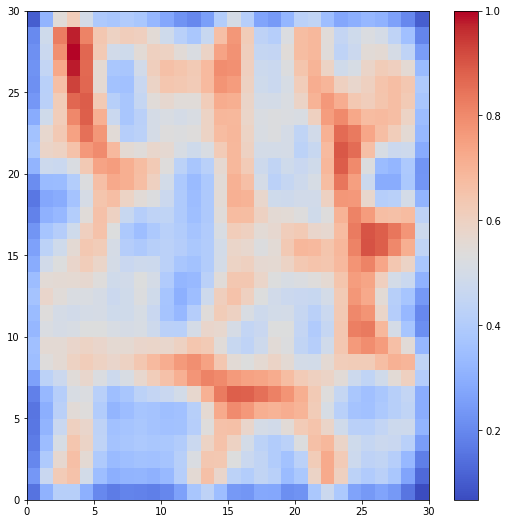

In [80]:
plt.figure(figsize=(9, 9))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # plotting the distance map as background
plt.colorbar()
plt.show()

Na U-Matrix da figura anterior, notamos que as regiões azuis ocorrem nos clusters, pois, nessas regiões, as distâncias entre um neurônio e os seus vizinhos tende a ser pequena, dado que os vizinhos são elementos semelhantes. 

Nas regiões de fronteira entre os clusters, notamos a cor vermelha, que representa uma região de transição, na qual elementos vizinhos não estão próximos em termos de distância euclidiana.

In [ ]:
n_neurons=4
m_neurons=3
input_len=64
sigma=1.0
learning_rate=1.0

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=1)
som.train(train_x,10000,verbose=True) #train with 10000 interactions

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 26.875942748564416


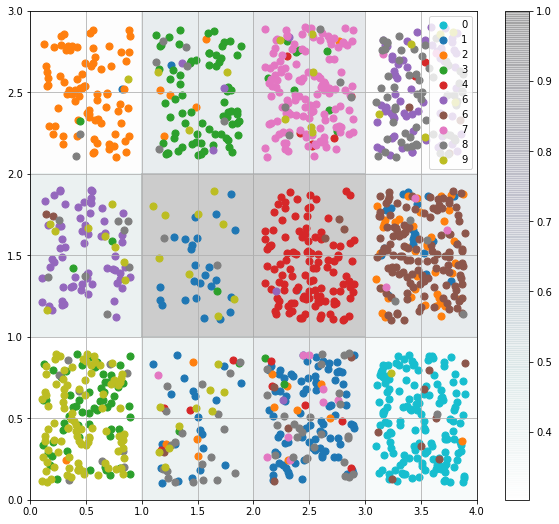

In [ ]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Com uma pequena quantidade de neurônios (4x3=12), observa=se uma separação entre as classes, porém há neurônios que receberam grandes quantidades de entradas de classes diferentes.

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=1)
som.train(train_x,100000,verbose=True) #train with 10000 interactions

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 26.729792963184885


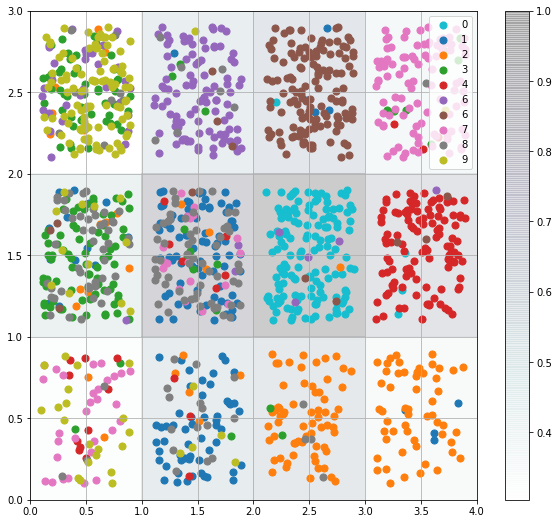

In [ ]:
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Nesse caso, mesmo com uma enorme quantidade de iterações (100.000), ainda há neurônios que ainda possuem classes bastante misturadas.

## Análise da influência da learning rate

In [86]:
n_neurons=14
m_neurons=14
input_len=64
sigma=1.0
learning_rate=1.0

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 18.053594743594626


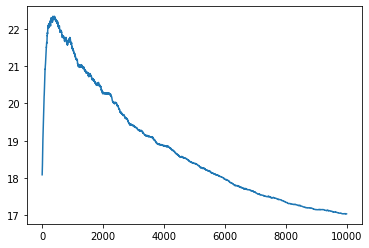

In [87]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=0.2)
som.train(train_x,10000,verbose=True) #train with 10000 interactions
qe1 = som.quantization_error(train_x)

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_x))
    som.update(train_x[rand_i], som.winner(train_x[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_x))
    t_error.append(som.topographic_error(train_x))

plt.plot(np.arange(max_iter), q_error, label='quantization error')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 16.35141810193341


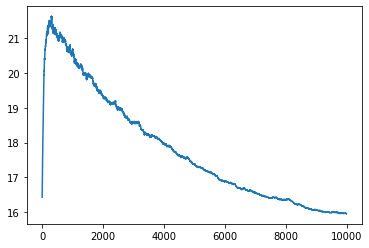

In [88]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=0.5)
som.train(train_x,10000,verbose=True) #train with 10000 interactions
qe2 = som.quantization_error(train_x)

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_x))
    som.update(train_x[rand_i], som.winner(train_x[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_x))
    t_error.append(som.topographic_error(train_x))

plt.plot(np.arange(max_iter), q_error, label='quantization error')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 15.895334363478867


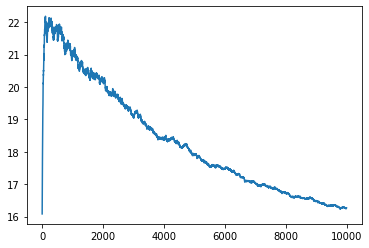

In [89]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=1.0)
som.train(train_x,10000,verbose=True) #train with 10000 interactions
qe3 = som.quantization_error(train_x)

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_x))
    som.update(train_x[rand_i], som.winner(train_x[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_x))
    t_error.append(som.topographic_error(train_x))

plt.plot(np.arange(max_iter), q_error, label='quantization error')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 29.821086666811578


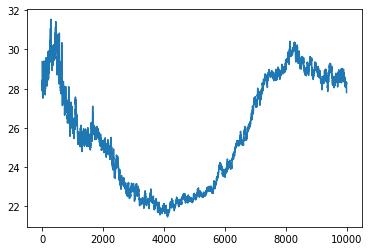

In [90]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=5.0)
som.train(train_x,10000,verbose=True) #train with 10000 interactions
qe4 = som.quantization_error(train_x)

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_x))
    som.update(train_x[rand_i], som.winner(train_x[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_x))
    t_error.append(som.topographic_error(train_x))

plt.plot(np.arange(max_iter), q_error, label='quantization error')

In [91]:
print("Erro de quantização com learning_Rate 0.2: {}".format(qe1))
print("Erro de quantização com learning_Rate 0.5: {}".format(qe2))
print("Erro de quantização com learning_Rate 1.0: {}".format(qe3))
print("Erro de quantização com learning_Rate 5.0: {}".format(qe4))

Erro de quantização com learning_Rate 0.2: 18.053594743594626
Erro de quantização com learning_Rate 0.5: 16.35141810193341
Erro de quantização com learning_Rate 1.0: 15.895334363478867
Erro de quantização com learning_Rate 5.0: 29.821086666811578


Observamos que, mantendo fixa a quantidade de iterações, learning_rate iniciais maiores trouxeram um menor erro de quantização no final. Entretanto, isso não é algo que é observado sempre. Tomando o caso limite de uma learning rate muito alta, como por exemplo 5, nota-se que o erro de quantização se torna muito grande, o que mostra que a rede não consegue aprender bem os padrões.
Deve-se buscar uma learning rate inicial que seja ótima.